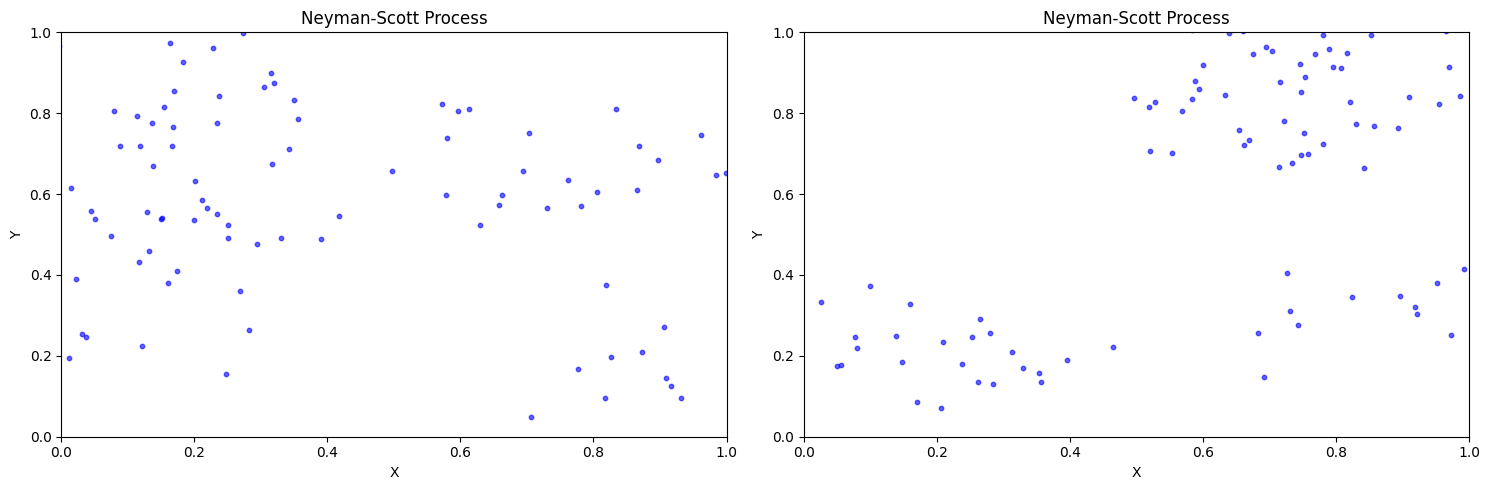

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def neyman_scott_process(lambda_parent, lambda_offspring, sigma, region, n_parents=None):
    """
    Simulate a Neyman-Scott process.

    :param lambda_parent: Intensity of the parent Poisson process (parents per unit area).
    :param lambda_offspring: Intensity of the offspring Poisson process (offspring per parent).
    :param sigma: Standard deviation of the Gaussian distribution for offspring locations.
    :param region: Tuple specifying the region (xmin, xmax, ymin, ymax).
    :param n_parents: Optional, specify the number of parent points directly.
    :return: Arrays of x and y coordinates of the offspring points.
    """
    xmin, xmax, ymin, ymax = region

    # Simulate parent points
    if n_parents is None:
        n_parents = np.random.poisson(lambda_parent * (xmax - xmin) * (ymax - ymin))
    
    parent_x = np.random.uniform(xmin, xmax, n_parents)
    parent_y = np.random.uniform(ymin, ymax, n_parents)

    # Simulate offspring points
    offspring_x = []
    offspring_y = []
    
    for px, py in zip(parent_x, parent_y):
        n_offspring = np.random.poisson(lambda_offspring)
        offspring_x.extend(np.random.normal(px, sigma, n_offspring))
        offspring_y.extend(np.random.normal(py, sigma, n_offspring))

    return np.array(offspring_x), np.array(offspring_y)

def plot_neyman_scott(lambda_parent, lambda_offspring, sigma, region, n_simulations=3):
    """
    Plot several realizations of the Neyman-Scott process.

    :param lambda_parent: Intensity of the parent Poisson process (parents per unit area).
    :param lambda_offspring: Intensity of the offspring Poisson process (offspring per parent).
    :param sigma: Standard deviation of the Gaussian distribution for offspring locations.
    :param region: Tuple specifying the region (xmin, xmax, ymin, ymax).
    :param n_simulations: Number of realizations to plot.
    """
    fig, axes = plt.subplots(1, n_simulations, figsize=(15, 5))
    
    for ax in axes:
        offspring_x, offspring_y = neyman_scott_process(
            lambda_parent, lambda_offspring, sigma, region
        )
        ax.scatter(offspring_x, offspring_y, s=10, color='blue', alpha=0.6)
        ax.set_xlim(region[0], region[1])
        ax.set_ylim(region[2], region[3])
        ax.set_title('Neyman-Scott Process')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    
    plt.tight_layout()
    plt.show()

# Define parameters
lambda_parent = 10    # intensity of the parent process
lambda_offspring = 10 # expected number of offspring per parent
sigma = 0.1           # standard deviation of offspring location distribution
region = (0, 1, 0, 1) # region of interest (xmin, xmax, ymin, ymax)

# Plot the Neyman-Scott process
plot_neyman_scott(lambda_parent, lambda_offspring, sigma, region, n_simulations=2)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Parameters
nu = 1   # Background intensity
alpha = 0.5  # Amplitude of the excitation
beta = 0.8   # Decay rate
N = 1000     # Number of events to simulate

# Initialization
t_events = []
S_n = [1]
t = 0

# Initial event time
U = np.random.uniform()
t1 = -np.log(U) / nu
t_events.append(t1)

# Simulate events
for n in range(1, N):
    # Generate random number
    U = np.random.uniform()
    
    # Define the equation to solve
    def equation(u):
        sum_exp = np.sum(np.exp(-beta * (u - np.array(t_events))))
        return np.log(U) + nu * (u - t_events[-1]) - (alpha / beta) * S_n[-1] * (1 - sum_exp)

    # Solve for u using Newton's method
    u = newton(equation, t_events[-1] + 1)  # Initial guess u = t_n + 1
    
    # Update events and S(n)
    t_events.append(u)
    S_new = np.exp(-beta * (u - t_events[-2])) * S_n[-1] + 1
    S_n.append(S_new)

# Convert to numpy array for plotting
t_events = np.array(t_events)

# Plot the simulated events
plt.figure(figsize=(12, 6))
plt.plot(t_events, np.arange(1, N + 1), drawstyle='steps-post')
plt.title('Simulated Hawkes Process')
plt.xlabel('Time')
plt.ylabel('Event Count')
plt.grid(True)
plt.show()

# Plot the conditional intensity
lambda_t = nu + alpha * np.sum(np.exp(-beta * (t_events[:, None] - t_events)), axis=0)

plt.figure(figsize=(12, 6))
plt.plot(t_events, lambda_t)
plt.title('Conditional Intensity of the Simulated Hawkes Process')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


RuntimeError: Failed to converge after 50 iterations, value is -8.78527264968543.

/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_13039/4246216823.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Hour'] = df['Timestamp'].dt.floor('H')


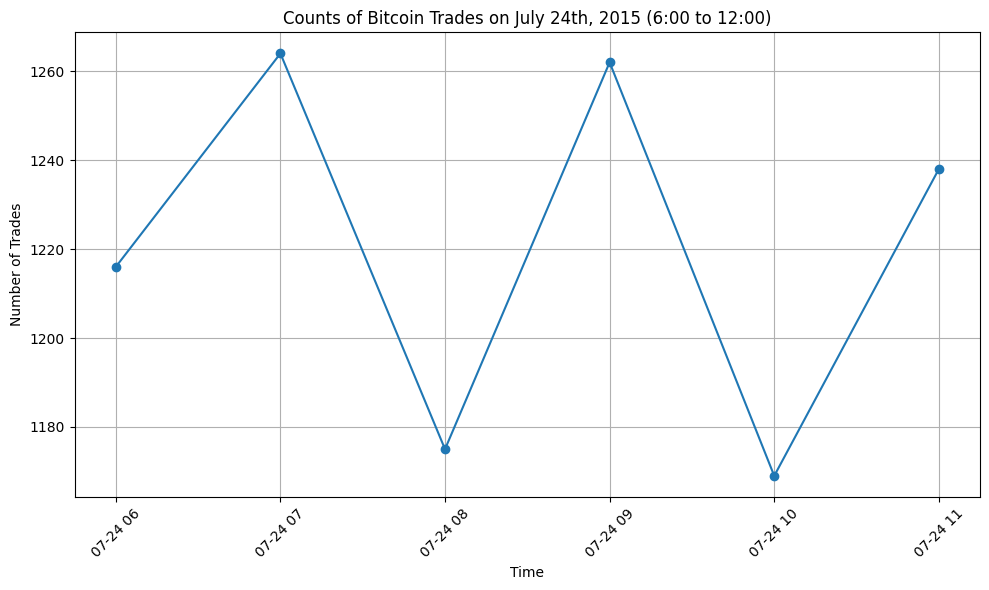

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data from the CSV file (assuming you have it locally downloaded)
# Replace 'your_file_path.csv' with the path to the file you downloaded.
file_path = 'path_to_your_downloaded_file.csv' # e.g., 'bitstampUSD.csv'

# Load data
# The file typically contains columns: timestamp, price, amount
# Use the appropriate columns if they differ.
df = pd.read_csv(file_path, names=['Timestamp', 'Price', 'Amount'])

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Filter for July 24th, 2015, between 6:00 and 12:00
start_time = datetime(2015, 7, 24, 6, 0, 0)
end_time = datetime(2015, 7, 24, 12, 0, 0)
filtered_df = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

# Group by each hour to count trades
filtered_df['Hour'] = filtered_df['Timestamp'].dt.floor('H')
trade_counts = filtered_df.groupby('Hour').size()

# Plot the counts of Bitcoin trades
plt.figure(figsize=(10, 6))
plt.plot(trade_counts.index, trade_counts.values, marker='o')
plt.title('Counts of Bitcoin Trades on July 24th, 2015 (6:00 to 12:00)')
plt.xlabel('Time')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
